In [47]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
%matplotlib inline

In [80]:
from keras.datasets import mnist

(X_tr, Y_tr), (X_te, Y_te) = mnist.load_data()

In [81]:
print (X_tr.shape, Y_tr.shape)
print (X_te.shape, Y_te.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [64]:
def plotimage():
    plt.subplot(224)
    plt.imshow(X_tr[4])
    plt.subplot(223)
    plt.imshow(X_tr[3])
    plt.subplot(222)
    plt.imshow(X_tr[2])
    plt.subplot(221)
    plt.imshow(X_tr[1])
   # plt.show()

In [71]:
def CNNKeras():
    model = Sequential()
    model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    BatchNormalization(axis=1)
    
    model.add(Conv2D(32, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    BatchNormalization(axis=1)
    
    model.add(Conv2D(64, 3, 3))
    model.add(Activation('relu'))
    BatchNormalization(axis=1)
    
    model.add(Conv2D(64, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    
    #Fully connected
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    
    #
    
    return model
    

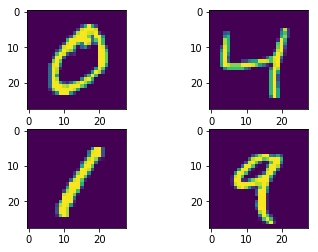

In [66]:
plotimage()

In [83]:
from keras.utils import np_utils
from keras.layers import Dense
from keras.layers import Dropout

num_pixels = X_tr[1] * X_te[2]
X_tr = np.reshape(X_tr, (-1, X_tr.shape[1], X_tr.shape[2], 1))
X_te = np.reshape(X_te, (-1, X_tr.shape[1], X_tr.shape[2], 1))
Y_tr = np_utils.to_categorical(Y_tr)
Y_te = np_utils.to_categorical(Y_te)

In [84]:
X_tr.shape, Y_tr.shape, X_te.shape, Y_te.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [85]:
n_classes = Y_tr.shape[1]
epochs = 10
lr = 1e-3
n_classes


10

In [86]:
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

model = CNNKeras()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  app.launch_new_instance()


In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 10, 10, 64)        0         
__________

In [88]:
model.add(Activation('softmax'))

In [89]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [90]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                        height_shift_range=0.08, zoom_range=0.08)

In [91]:
test_gen = ImageDataGenerator()

In [93]:
train_generator = gen.flow(X_tr, Y_tr, batch_size=64)
test_generator = test_gen.flow(X_te, Y_te, batch_size=64)

In [95]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 157s 167ms/step - loss: 1.2049 - acc: 0.8543 - val_loss: 0.0387 - val_acc: 0.9868
Epoch 2/5
937/937 [==============================] - 163s 174ms/step - loss: 0.1188 - acc: 0.9654 - val_loss: 0.0269 - val_acc: 0.9914
Epoch 3/5
937/937 [==============================] - 158s 168ms/step - loss: 0.0937 - acc: 0.9724 - val_loss: 0.0393 - val_acc: 0.9879
Epoch 4/5
937/937 [==============================] - 166s 177ms/step - loss: 0.0811 - acc: 0.9751 - val_loss: 0.0244 - val_acc: 0.9929
Epoch 5/5
937/937 [==============================] - 180s 192ms/step - loss: 0.0750 - acc: 0.9775 - val_loss: 0.0246 - val_acc: 0.9923


In [ ]:
score = model.evaluate(X_te, Y_te)
print('Test Accuracy: {}'.format(score[1]))

In [ ]:
predictions = model.predict_classes(X_te)

predictions = list(predictions)
actuals = list(Y_te)

sub = pd.DataFrame({'Targets':actuals, 'Predicted':predictions})

